# HW 3

In [1]:
import netCDF4
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt

## 1. Global methane levels from 2002
Methane (CH4) is a naturally occurring Greenhouse Gas (GHG), but one whose abundance has been increased substantially above its pre-industrial value by human activities, primarily because of agricultural emissions (e.g., rice production, ruminants) and fossil fuel production and use. A clear annual cycle is largely due to seasonal wetland emissions.

Atmospheric methane abundance is indirectly observed by various satellite instruments. These instruments measure spectrally resolved near-infrared and infrared radiation reflected or emitted by the Earth and its atmosphere. In the measured signal, molecular absorption signatures from methane and constituent gasses can be identified. It is through analysis of those absorption lines in these radiance observations that the averaged methane abundance in the sampled atmospheric column can be determined.

For this problem set, methane levels have been determined by applying several algorithms to different satellite instruments. Download the netCDF4 file (200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc) here, which contains monthly-averaged methane levels (xch4) in the unit of ppb at each 5° (lon) x 5° (lat) grid over the globe from 2003-01 to 2020-06.


In [2]:
# Open a netCDF4 file
ds1 = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
ds1

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

### 1.1 [5 points] Compute methane climatology for each month, and plot your results in 12 panels.

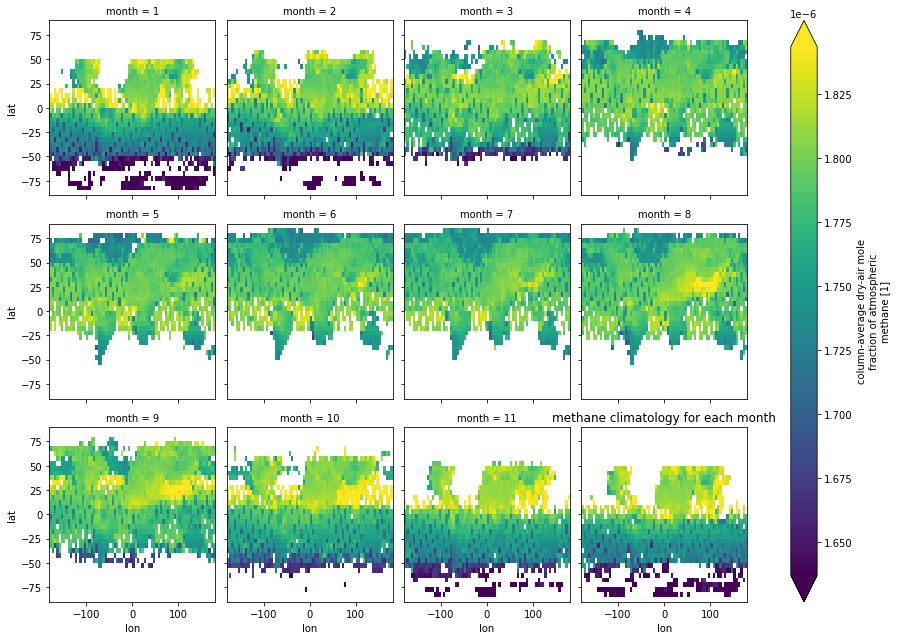

In [72]:
ds1_clim =ds1.xch4.groupby('time.month').mean()
ds1_clim.plot(col="month", col_wrap=4, robust=True)
plt.title('methane climatology for each month')
plt.show()

### 1.2 [5 points] Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. Describe your results. Check your plot with this one.

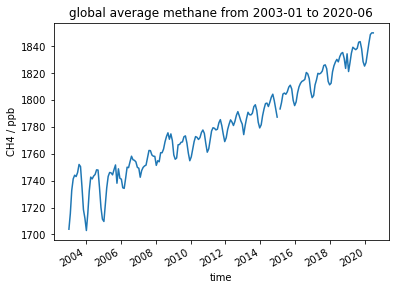

In [4]:
ch4_global_mean =ds1.xch4.sel(time =slice("2003-01", "2020-06")).mean(dim =('lat','lon'))*1e9
ch4_global_mean.plot()
plt.ylabel('CH4 / ppb')
plt.title('global average methane from 2003-01 to 2020-06')
plt.show()

### 1.3 [5 points] Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series. Describe your results.

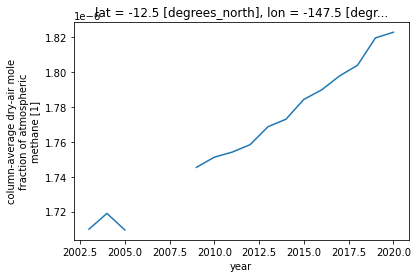

In [7]:
ds1.xch4.sel(lon =-150, lat =-15, method ='nearest').groupby('time.year').mean(dim ='time').plot()

## 2. Niño 3.4 index

The Niño 3.4 anomalies may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (5N-5S, 170W-120W). The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.5°C for a period of 5 months or more. Check Equatorial Pacific Sea Surface Temperatures for more about the Niño 3.4 index.

In this problem set, you will use the sea surface temperature (SST) data from NOAA. Download the netCDF4 file (NOAA_NCDC_ERSST_v3b_SST.nc) here.


In [8]:
ds2 =xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc', engine="netcdf4")
ds2.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...>

### 1.1 [10 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

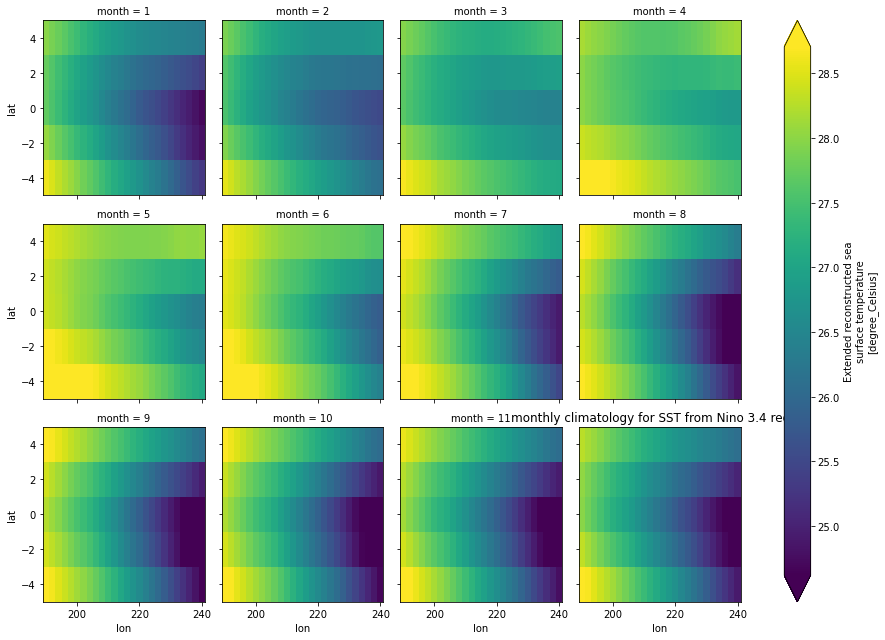

In [9]:
nino_region =ds2.sst.sel(lat=slice(-5, 5),lon =slice(190,240))
nino_month =nino_region.groupby('time.month')
nino_month.mean().plot(col="month", col_wrap=4, robust=True)
plt.title('monthly climatology for SST from Nino 3.4 region')
plt.show()

### 1.2 [10 points] Visualize the computed Niño 3.4. Your plot should look similar to this one.

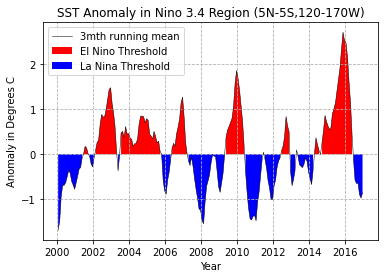

In [71]:
nino_anom =nino_month-nino_month.mean(dim='time')
nino_region_anom =nino_anom.mean(dim =['lat','lon']).sel(time =slice('2000-01','2016-12'))
nino_plot =pd.DataFrame(nino_region_anom.values,nino_region_anom.time,columns=['sst'])
# time_plot =nino_region_anom.time
# print(nino_plot)
# nino =pd.DataFrame(nino_plot.where(nino_plot >0))
# nina =pd.DataFrame(nino_plot.where(nino_plot <0))
plt.grid(linestyle ='--')
plt.fill_between(nino_plot.index,0,nino_plot.sst, where= nino_plot.sst>0,facecolor ='red', label ='El Nino Threshold')
plt.fill_between(nino_plot.index,0,nino_plot.sst, where=nino_plot.sst<0, facecolor ='blue', label ='La Nina Threshold')
plt.plot(nino_plot.index, nino_plot.sst, color ='black', linewidth =0.5, label ='3mth running mean')
plt.ylabel('Anomaly in Degrees C')
plt.xlabel('Year')
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)')
plt.legend()
plt.show()

## 3. Explore a netCDF dataset

Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format, and have temporal information.

### 3.1 [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.

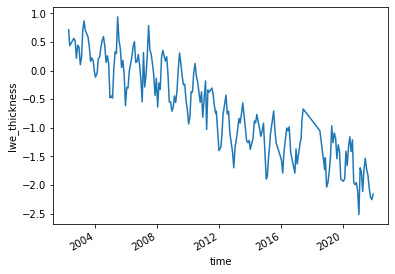

In [88]:
ds3 = xr.open_dataset('GRCTellus.JPL.200204_202207.GLO.RL06M.MSCNv02CRI.nc')
# ds3.info
ds3.lwe_thickness.mean(dim=('lon', 'lat')).sel(
    time=slice("2002-04", "2021-12")
).plot()

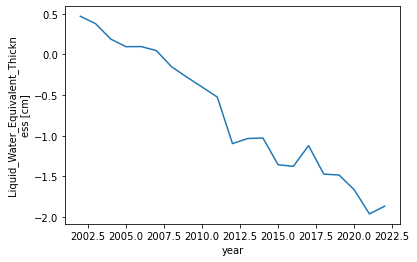

In [85]:
# Plot a time series of a certain variable with monthly seasonal cycle removed by mean.
ds3.lwe_thickness.groupby('time.year').mean(dim =('time','lat','lon')).plot()

### 3.2 [10 points] Make at least 5 different plots using the dataset.

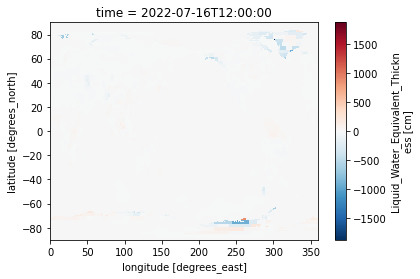

In [102]:
# Plot mean DEM in the latest month
ds3.lwe_thickness[-1].plot()

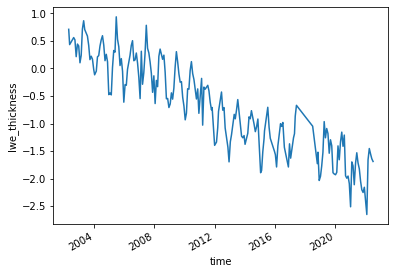

In [117]:
# mean time series
ds3.lwe_thickness.mean(dim=('lon', 'lat')).plot()

Text(0.5, 1.0, 'Corrected global mean DEM')

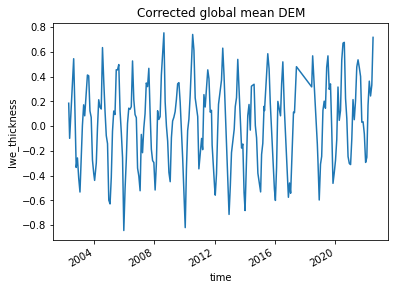

In [115]:
import numpy as np
# Create the weights
weights = np.cos(np.deg2rad(ds3.lat))
weights.dims
lwe_weighted = ds3.lwe_thickness.weighted(weights)
lwe_weighted.mean(dim=('lon', 'lat')).plot()
plt.title("Corrected global mean DEM")

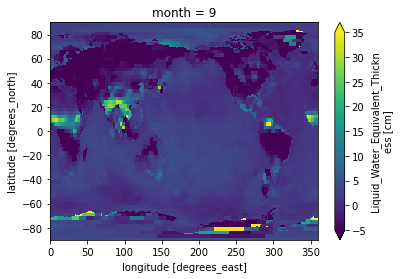

In [103]:
# Plot the averaged global SST at Sep.
ds3.lwe_thickness.groupby('time.month').mean()[8,:,:].plot(vmin=-5, vmax=35)

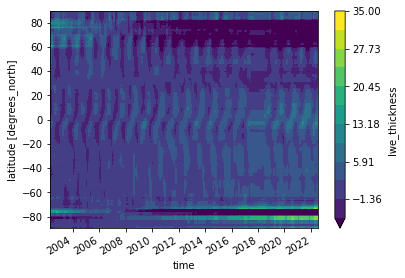

In [97]:
# Plot zonal mean
ds3.lwe_thickness.mean(dim='lon').plot.contourf(x='time', 
                                       levels=12, vmin=-5, vmax=35)

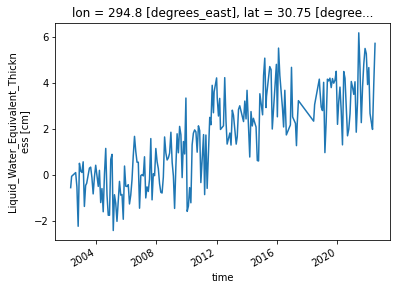

In [108]:
# Plot climatology at a specific point
ds3.lwe_thickness.sel(lon=294.55, lat=30.5, method='nearest').plot()

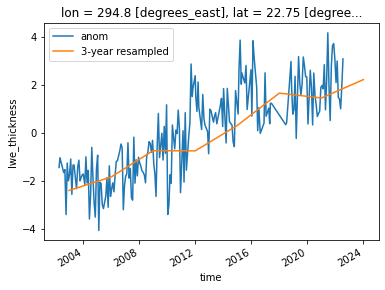

In [112]:
# Group data by month
group3 = ds3.lwe_thickness.groupby('time.month')

# Apply mean to grouped data, and then compute the anomalies 
lwe_anom = group3 - group3.mean(dim='time')

# Use resample() function at a frequency of 3 years
resample_obj = lwe_anom.resample(time="3Y")

# Show the resample object
resample_obj

# Apply mean() function to the resample object and get results
ds_anom_resample = resample_obj.mean(dim="time")
ds_anom_resample

# Plot anomalies
lwe_anom.sel(lon=294.55, lat=30.5, 
             method='nearest').plot(label ='anom')

# Plot 3-year resampled anomalies
ds_anom_resample.sel(lon=114.55+180, lat=22.5, 
                     method='nearest').plot(label ='3-year resampled')

plt.legend()
plt.show()